# Instagram Filter Replication- Pencil Sketch & Cartoonify

The goal of this project is to demonstrate OpenCV techniques and functions which can be used to create Instagram filter replications. Particularly concepts such as Gaussian Blur, Laplacian Filter, Bilateral Filter & Thresholding are used to create these filters.

### Gaussian Blur-

This is one of many low-pass filters which retails only the low frequency information from the images. This is particularly & very popularly used to denoise images as any high-frequency noise is immediately removed from the image. Implemented in OpenCV as cv2.GaussianBlur(src, ksize, sigmaX, sigmaY), where src= source image, ksize= kernel size used for filtering (must be odd and +ve. Higher value results in a higher blur effect. Ideally use sizes between 3, 5 & 7.), sigmaX= std of the image in the X direction (Greater the value greater the blur. If set to zero then blur comes from the kernel only), sigmaY= std of the image in the Y direction (If set to 0 then uses the value from sigmaX).

### Laplacian Filter-

This takes a second-order derivative of the image. Image derivative or gradients determine how the color changes (pixel intensities) in a particular image. Greater the color change more the gradient vary in magnitude. This can give us lot of information about the image particularly about certain edges, borders and shapes. Implemented in OpenCV as cv2.Laplacian(src, ddepth, ksize, scale, delta) where src= source image, ddepth= data-type of the output image (must be a float value), ksize= kernel size, scale= an optional value to scale the calculated gradients by, delta= an optional value to add a bias to the calculated gradients. The Laplacian filter is extremely sensitive to the noise since it's a second order derivative, so it's important to denoise the image using any blurring filter like Gaussian filter. 

### Bilateral Filter-

A general problem with blurring filters such as Gaussian and Median is that they either take the spatial or color intensity but not both into consideration. This means that they do not become edge-preversing for larger values of sigma. Hence Bilateral filtering can be used in such situations. As the name suggests it takes into consideration both the pixel space and color intensity. Pixels closer in distance and intensity are blurred stronger than those which are farther in both distance and intensity. Hence it preserves certain information such as edges much better which still denoising the images. Implemented in OpenCV as cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace) where src= source image, d= diameter of each pixel neighbourhood, sigmaColor= Larger values mean more farther colors are considered and weighted, sigmaSpace= similar as sigmaColor but for pixel spatial information. Ignored if d is already used.

In [1]:
# Importing the required packages
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Setting up matplotlib parameters for a better display
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 15.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
# Defining a function to create a pencil sketch of an image
def pencilSketch(image):
    # Converting image to gray-scale
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    # Gaussian blurring to remove noise with a kernel-size of 5
    img_g=cv2.GaussianBlur(image,(5,5),0,0)
    # Calculating the laplacian of the image.
    # Notice how the 2nd parameter changes the data-type of the image to float32
    # Kernel size used is 3 and scale and delta values are determined by experimentations
    img_l=cv2.Laplacian(img_g,cv2.CV_32F,3,scale=25,delta=50)
    # Min-Max Normalizing the image to perform further operations
    cv2.normalize(img_l,dst=img_l,alpha=0,beta=1,norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_32F);
    # Converting the image back to uint8 format
    img_i=np.uint8(img_l*255)
    # Thresholding the image to remove any noise (in this case tiny spots of pencil marks all around the image)
    img_t=cv2.threshold(img_i,147,255,cv2.THRESH_BINARY_INV)[1]
    # Converting in back to 3 color channel for display
    pencilSketchImage=cv2.cvtColor(img_t,cv2.COLOR_GRAY2BGR)
    return pencilSketchImage

In [4]:
def cartoonify(image):
    # Performing pencil-sketch first
    pencil_sketch= pencilSketch(image)
    # Inverting the pencil- sketch image to create a mask to use for the cartoonify filter 
    c_mask=cv2.bitwise_not(pencil_sketch)
    # Using a bilateral filter to enhance the edges of the image as these enhanced edges will create a cartoon like effect
    img_b=cv2.bilateralFilter(image,20,150,150)
    # Subtracting the mask from the image will highlight and amplify the edges of the image
    cartoonImage=cv2.subtract(img_b,c_mask)
    return cartoonImage

In [5]:
# Path to image. Change this to represent your own images
imagePath= 'Roger Federer.jpg'
# Reading the image using openCV
img= cv2.imread(imagePath)

# calling the pencilSketch function to generate the sketch
pencil_image= pencilSketch(img)

# calling the cartoonify function to generate the cartoon of the image
cartoon_image= cartoonify(img)

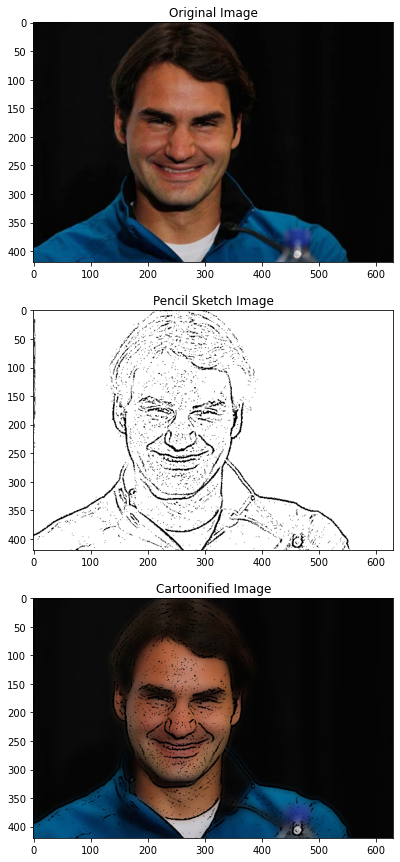

In [6]:
# Displaying the images
plt.subplot(311);
plt.title('Original Image')
plt.imshow(img[:,:,::-1])
plt.subplot(312);
plt.title('Pencil Sketch Image')
plt.imshow(pencil_image[:,:,::-1])
plt.subplot(313);
plt.title('Cartoonified Image')
plt.imshow(cartoon_image[:,:,::-1])